# HW 4 Numerical problems

Here, we will explore single-qubit dynamics in an example of a so-called *non-Markovian* environment. As the simplest possible example, we consider the case where we have a *randomly chosen, unknown* noise field $h_3$ under which our qubit evolves. Our goal is to try and maintain a certain desired qubit state despite this unknown field $h_3$, for example $|\psi\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$.

We have already seen in the analytical section of this homework that this can be resolved by performing a so-called *dynamical decoupling* sequence, consisting of precisely timed unitary rotations $R_{\hat{x}}(\pi)$ and/or $R_{\hat{y}}(\pi)$, known as $\pi$-pulses.

We will now explore the effect of realistic imperfections in these unitary rotations. Do the errors associated with these imperfect rotations accumulate? Or can we design dynamical decoupling sequences that are *robust* to pulse errors? Exploring these questions will be the purpose of this notebook.

## Problem 3.5

First, we will just explore the CP sequence with finite error. The evolution will be of the form $(\tau - R_{\hat{y}}(\pi) - \tau)^N$, where $\tau$ is our interval of free-evolution under the unknown $h_3$, $R_{\hat{y}}(\pi)$ is our dynamical decoupling unitary rotation, and $N$ is the number of repetitions. To simulate realistic experimental conditions, we will add a tiny error $\epsilon$ to our pulse, so it will actually be described as $R_{\hat{y}}(\pi + \epsilon)$.

In [1]:
# Import necessary packages
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def solve_me_CP(h3, epsilon, N, tau, pts=100):
    """ Solves single qubit dynamics for CP-N sequence
    
    See HW3 for details on the Hamiltonian
    :param h3: random field strength
    :param epsilon: pulse error
    :param N: number of pulses
    :param tau: length of each time interval
    :param pts: (optional) number of points to simulate for each tau
    """
    
    # create Hamiltonian
    H = h3*sigmaz()
    
    # Operators to measure
    # when blank it calculates full state
    m_ops = [sigmax(), sigmay(), sigmaz()]
    
    # Initial state along x axis
    psi_0 = (basis(2,0)+basis(2,1)).unit()
    psi_i = psi_0
    
    time = np.linspace(0, tau, pts)
    state_list = [None]*pts*2*N
    
    for index, interval in enumerate(range(N)):
        
        # Evolve for time tau, get last state
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts:index*2*pts+pts] = results
        
        # Apply desired pulse to most recent state
        psi_i = (np.cos((np.pi+epsilon)/2)*identity(2)
                 + 1j*np.sin((np.pi+epsilon)/2)*sigmay())*results[-1]
        
        # Evolve for time tau
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts+pts:(index+1)*2*pts] = results
        
        # Set current state
        psi_i = results[-1]
        
    return state_list

First we will pick a random $h_3$. In this setting, $h_3$ is unknown, so our goal is to cancel out the effect of $h_3$. You are welcome to try running the notebook for various values of $h_3$ if desired.

In [3]:
# Now we will pick a random h3 in the range [0, pi/4]
h3 = np.random.random()*np.pi/4
print('Randomly chosen h3:', h3)

Randomly chosen h3: 0.3914261535435353


Let's pick a small error $\epsilon = 0.02$.

In [4]:
epsilon = 0.02
tau = 1
x = (basis(2,0)+basis(2,1)).unit()

We will start with just $N = 2$ and see what happens on the Bloch sphere, as well as calculate the Fidelity.

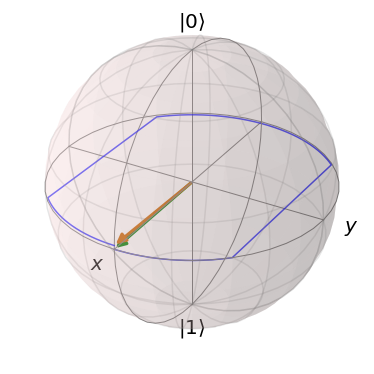

Fidelity of final state:  0.9997989983772559


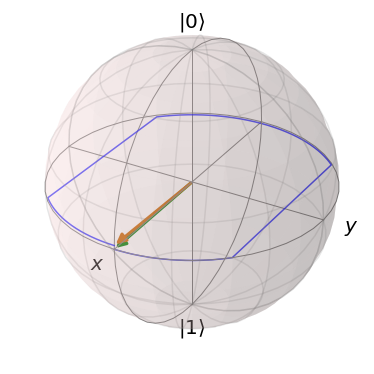

In [5]:
# Solve
N = 2
result = solve_me_CP(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

So with just a single pulse, we can still reproduce the initial state with a high fidelity. Now we will try for slightly larger $N = 8$.

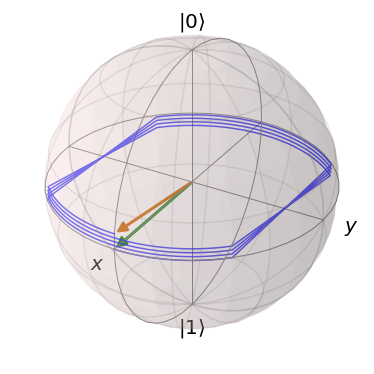

Fidelity of final state:  0.9967872156486853


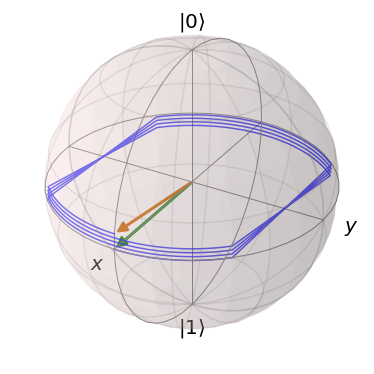

In [6]:
# Solve
N = 8
result = solve_me_CP(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

It does seem to get worse with higher N. Now explore for larger and larger N, and try to understand how $\mathcal{F}$ scales with the number of pulses. Try to develop and explain your physical intuition for what you see.

*Note: for larger and larger N, this simulation will take longer! You can place:*

%%time

*at the top of your cell to see how long it took your kernel to evaluate the cell.*

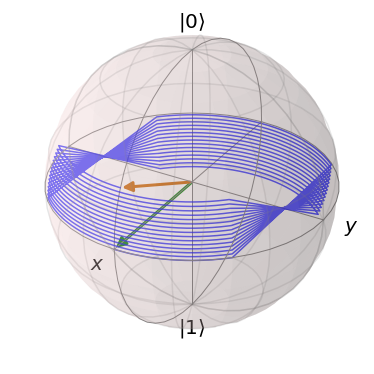

Fidelity of final state:  0.9554493895256261


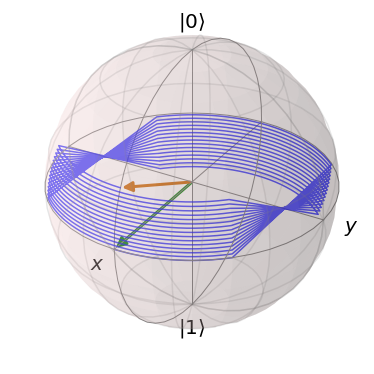

In [7]:
# Try larger N here
N = 30
result = solve_me_CP(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

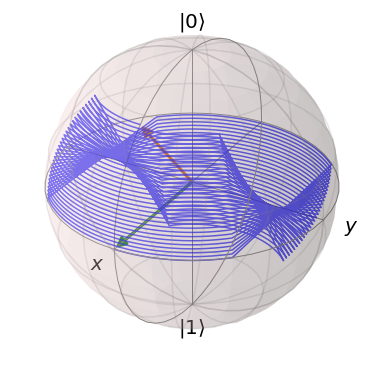

Fidelity of final state:  0.8297365393106535


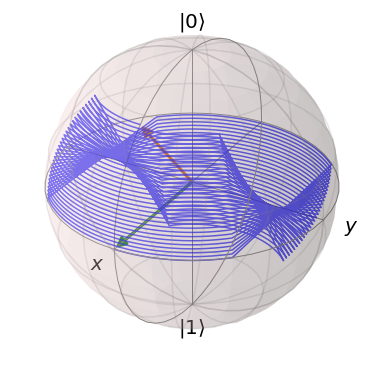

In [8]:
# Try larger N here
N = 60
result = solve_me_CP(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

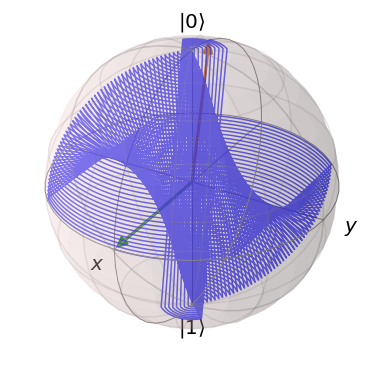

Fidelity of final state:  0.3792142403545912


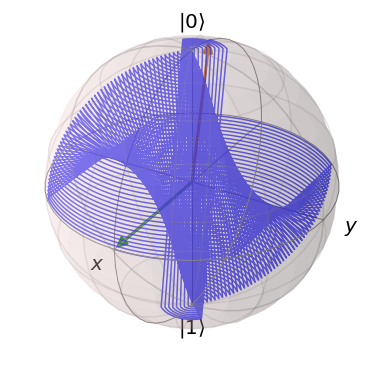

In [9]:
# Even larger N
# Try larger N here
N = 128
result = solve_me_CP(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

<font color="blue" size="4">
      We can clearly see that for large $N$ we are unable to recover the initial state. The error in the imperfect rotation has accumulated over several pulses and now gives a result far away from the initial one.
</font>

<font color="blue" size="4">
      In order to analyze the fidelity with respect to the number of pulses $N,$ let us plot the obtained fidelity $\mathcal F$ for different values of $N.$
</font>

In [10]:
# Analyze fidelity vs N
# Get fidelity for values of N increasing by 6 from 2 to up to 128
N_arr = list(range(2, 145, 6))
fidelities = []
for N in N_arr:
    result = solve_me_CP(h3, epsilon, N, tau)
    fidelities.append(fidelity(result[-1], x)**2)

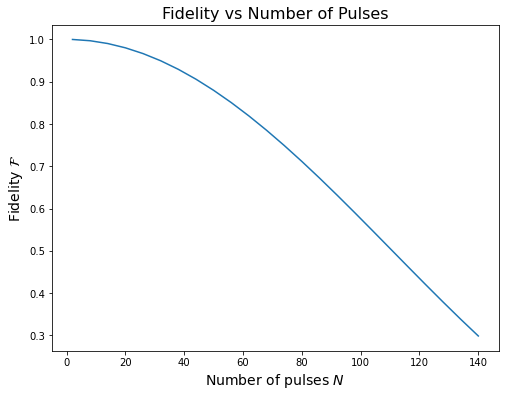

In [11]:
plt.figure(figsize=(8, 6))
plt.title('Fidelity vs Number of Pulses', size=16)
plt.xlabel(r'Number of pulses $N$', size=14)
plt.ylabel(r'Fidelity $\mathcal{F}$', size=14)
plt.plot(N_arr, fidelities)
plt.show()

<font color="blue" size="4">
      We can see that the fidelity decreases as $N$ increases, with $\mathcal{F} \to 1$ as $N \to 0$ and $\mathcal{F} \to 0 as N \to \infty.$ Note that the graph is very similar to the graph of a logisitic function.
</font>

## Problem 4.4

We have already seen in problem 4.1 how changing the axis of rotation of subsequent pulses can help cancel out some of the errors. Now we will explore the XY4 sequence, which consists of pulses which follow the pattern YXYX. 

In [12]:
def solve_me_XY4(h3, epsilon, N, tau, pts=100):
    """ Solves single qubit dynamics for XY8-k sequence
    
    See HW3 for details on the Hamiltonian
    :param h3: random field strength
    :param epsilon: pulse error
    :param N: number of pulses
    :param tau: length of each time interval
    :param pts: (optional) number of points to simulate for each tau
    """
    
    # create Hamiltonian
    H = h3*sigmaz()
    
    # Operators to measure
    # when blank it calculates full state
    m_ops = [sigmax(), sigmay(), sigmaz()]
    
    # Initial state along x axis
    psi_0 = (basis(2,0)+basis(2,1)).unit()
    psi_i = psi_0
    
    time = np.linspace(0, tau, pts)
    state_list = [None]*pts*2*N
    
    for index, interval in enumerate(range(N)):
        
        # Evolve for time tau, get last state
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts:index*2*pts+pts] = results
        
        # Apply pulse to most recent state
        # The second and fourth pulse should be X
        if index%4 in [1,3]:
            psi_i = (np.cos((np.pi+epsilon)/2)*identity(2)
                     + 1j*np.sin((np.pi+epsilon)/2)*sigmax())*results[-1]
        # First and third pulse is Y
        else:
            psi_i = (np.cos((np.pi+epsilon)/2)*identity(2)
                     + 1j*np.sin((np.pi+epsilon)/2)*sigmay())*results[-1]
        
        # Evolve for time tau
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts+pts:(index+1)*2*pts] = results
        
        # Set current state
        psi_i = results[-1]
        
    return state_list

We will use the same error parameters as for the CP sequence, and will again randomly choose an $h_3$. First, we will simulate for $N=8$, which is the shortest possible block for the XY8-k sequence.

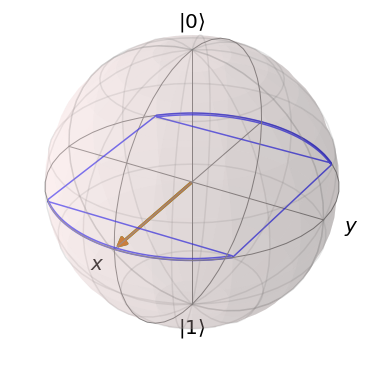

Fidelity of final state:  1.0000000278764822


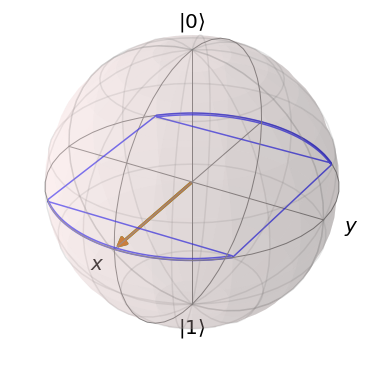

In [13]:
# Solve
N = 4
result = solve_me_XY4(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

Now try increasing N, up to $N = 128$. How does the performance compare to CP?

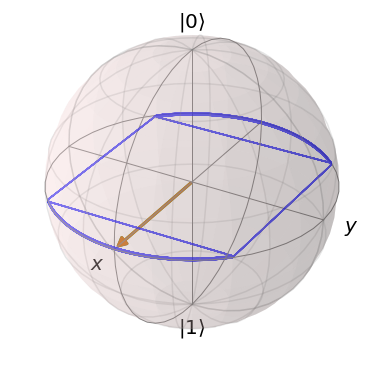

Fidelity of final state:  1.0000000257836403


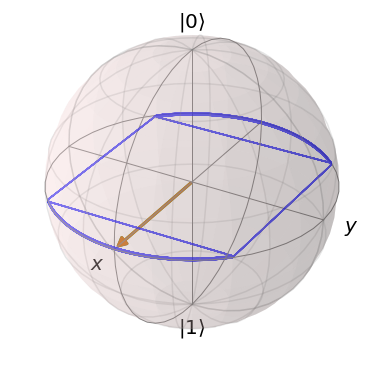

In [14]:
# Check performance of XY4
# Solve
N = 20
result = solve_me_XY4(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

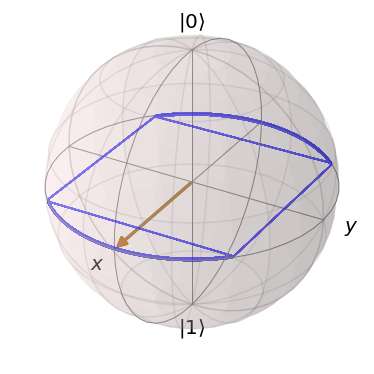

Fidelity of final state:  1.0000000256342954


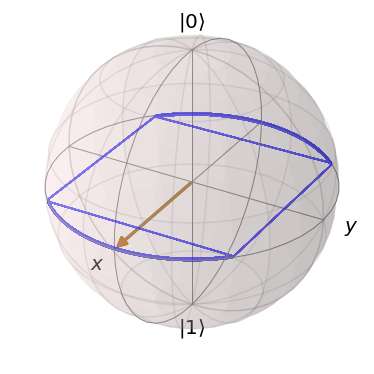

In [15]:
# Solve
N = 52
result = solve_me_XY4(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

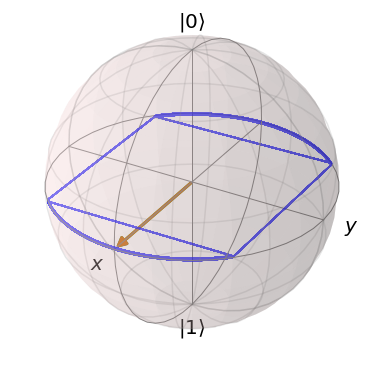

Fidelity of final state:  0.9999999995851518


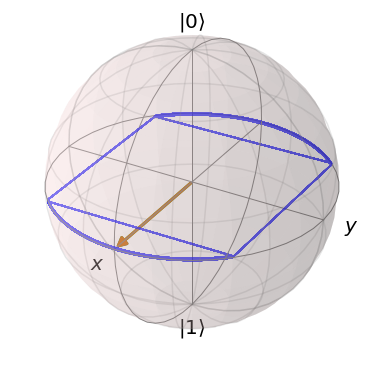

In [16]:
# Solve
N = 80
result = solve_me_XY4(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

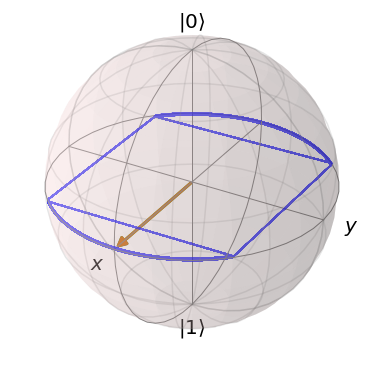

Fidelity of final state:  1.0000000138391512


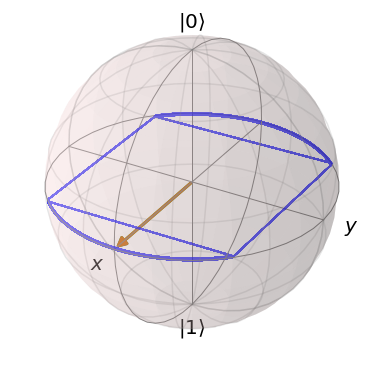

In [17]:
# Solve
N = 128
result = solve_me_XY4(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

<font color="blue" size="4">
      We can see that the $XY4$ decoupling sequence has a much greater fidelity than the $CP$ sequence. Even for large $N,$ the $XY4$ sequence still recovers the initial state with essentially complete fidelity. And we see that the value of $N$ has no effect on the $XY4$ sequence, since it yields practically the same fidelity for $N = 4$ and for $N = 128.$
</font>

## Problem 4.5

Now try plugging in a large error $\epsilon$ and see how XY4 performs for various N

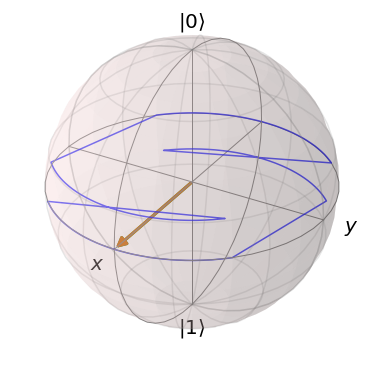

Fidelity of final state:  0.9999998566727373


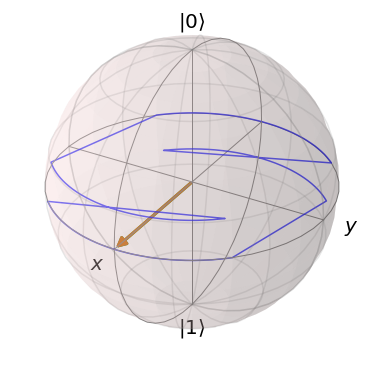

In [18]:
# Explore XY4 for large epsilon
epsilon = 0.4
N = 4
result = solve_me_XY4(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

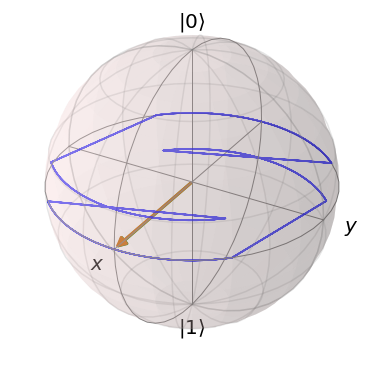

Fidelity of final state:  0.9999959903729517


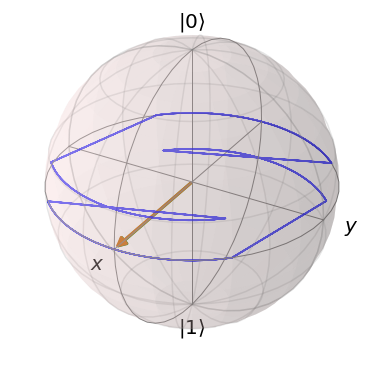

In [19]:
# Explore XY4 for large epsilon
epsilon = 0.4
N = 20
result = solve_me_XY4(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

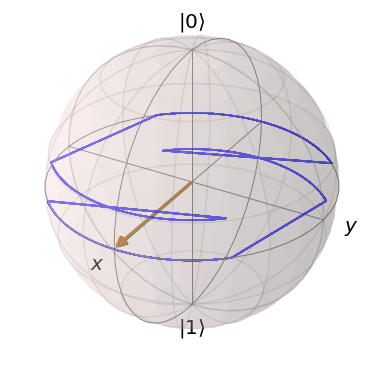

Fidelity of final state:  0.9999838423480808


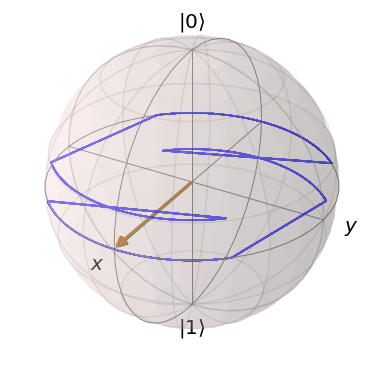

In [20]:
# Explore XY4 for large epsilon
epsilon = 0.4
N = 40
result = solve_me_XY4(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

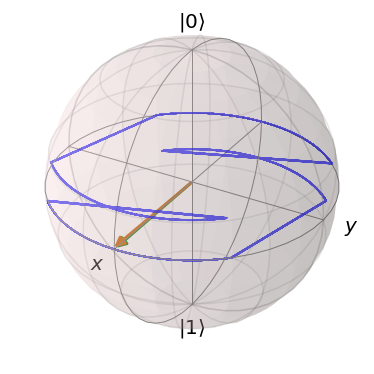

Fidelity of final state:  0.9999586472952954


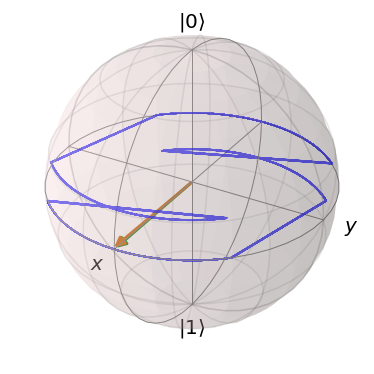

In [21]:
# Explore XY4 for large epsilon
epsilon = 0.4
N = 64
result = solve_me_XY4(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

<font color="blue" size="4">
      We can see that the large value of $\epsilon$ means a very large decrease in the fidelity of the $XY4$ sequence.
</font>

Next, we can try the symmetrized version which follows the pattern YXYX-XYXY. Create a function solve_me_XY8 which implements this pattern (should be a relatively simple modification of solve_me_XY4), and explore its performance in this large error regime.

In [22]:
# Define function solve_me_XY8
def solve_me_XY8(h3, epsilon, N, tau, pts=100):
    """ Solves single qubit dynamics for XY8-k sequence
    
    See HW3 for details on the Hamiltonian
    :param h3: random field strength
    :param epsilon: pulse error
    :param N: number of pulses
    :param tau: length of each time interval
    :param pts: (optional) number of points to simulate for each tau
    """
    
    # create Hamiltonian
    H = h3*sigmaz()
    
    # Operators to measure
    # when blank it calculates full state
    m_ops = [sigmax(), sigmay(), sigmaz()]
    
    # Initial state along x axis
    psi_0 = (basis(2,0)+basis(2,1)).unit()
    psi_i = psi_0
    
    time = np.linspace(0, tau, pts)
    state_list = [None]*pts*2*N
    
    for index, interval in enumerate(range(N)):
        
        # Evolve for time tau, get last state
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts:index*2*pts+pts] = results
        
        # Apply pulse to most recent state
        # The second and fourth pulse should be X
        if index%8 in [1,3,4,6]:
            psi_i = (np.cos((np.pi+epsilon)/2)*identity(2)
                     + 1j*np.sin((np.pi+epsilon)/2)*sigmax())*results[-1]
        # First and third pulse is Y
        else:
            psi_i = (np.cos((np.pi+epsilon)/2)*identity(2)
                     + 1j*np.sin((np.pi+epsilon)/2)*sigmay())*results[-1]
        
        # Evolve for time tau
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts+pts:(index+1)*2*pts] = results
        
        # Set current state
        psi_i = results[-1]
        
    return state_list

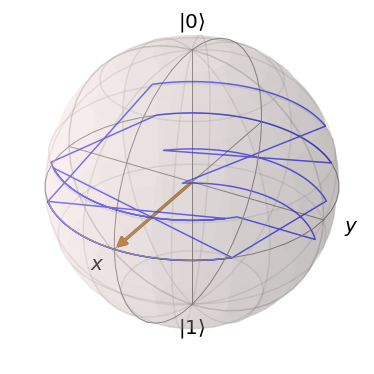

Fidelity of final state:  1.0000000182797142


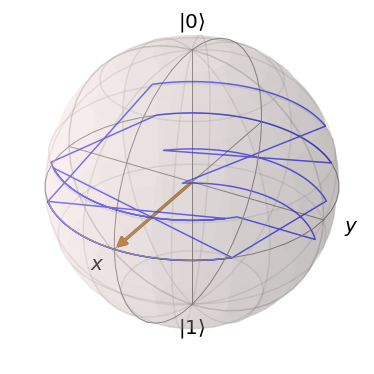

In [23]:
# Explore performance of XY8
N = 8
result = solve_me_XY8(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

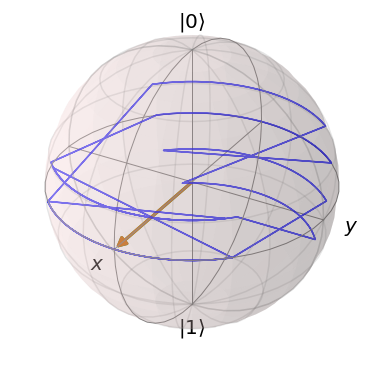

Fidelity of final state:  0.9999999677517375


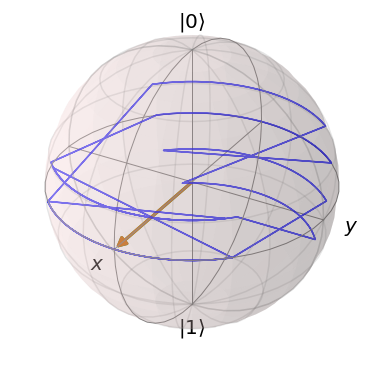

In [24]:
# Explore performance of XY8
N = 16
result = solve_me_XY8(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

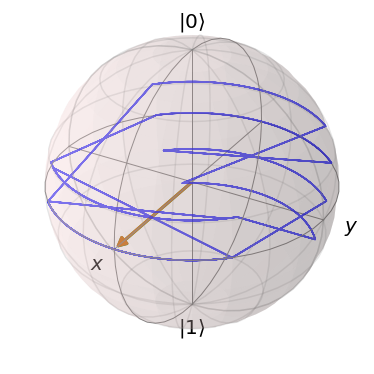

Fidelity of final state:  0.9999996965418386


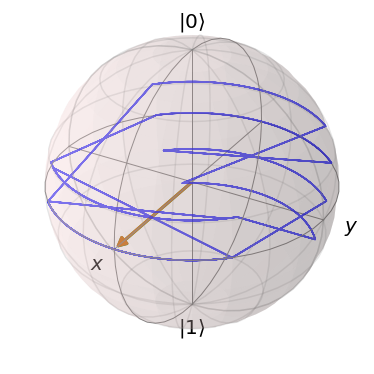

In [25]:
# Explore performance of XY8
N = 40
result = solve_me_XY8(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

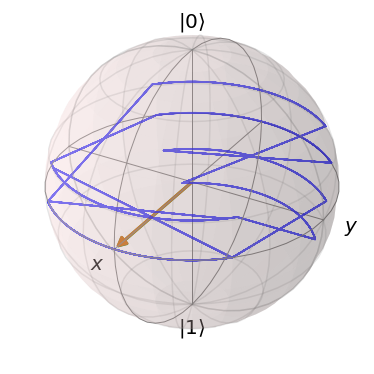

Fidelity of final state:  0.9999991679268695


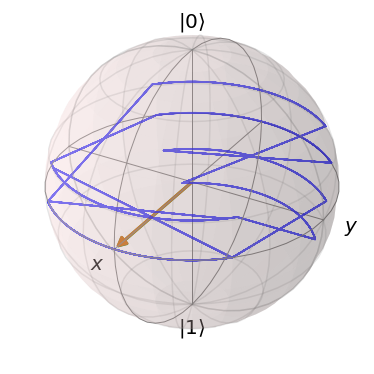

In [26]:
# Explore performance of XY8
N = 64
result = solve_me_XY8(h3, epsilon, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

<font color="blue" size="4">
      It can be seen that the $XY8$ works
</font>

## Problem 4.6

Finally, try to implement the so-called *phase errors* described in the problem set. Start with some simple pulse sequences (CP, small N) to try and get an intuition for the role of phase errors on the Bloch sphere. Then explore the robustness of the various pulse sequences (CP, XY4, and XY8) to phase errors.

In [27]:
# CP pulse with additional axes error
def solve_me_CP(h3, epsilon, eta_y, N, tau, pts=100):
    # create Hamiltonian
    H = h3*sigmaz()
    
    # Operators to measure
    # when blank it calculates full state
    m_ops = [sigmax(), sigmay(), sigmaz()]
    
    # Initial state along x axis
    psi_0 = (basis(2,0)+basis(2,1)).unit()
    psi_i = psi_0
    
    time = np.linspace(0, tau, pts)
    state_list = [None]*pts*2*N
    
    for index, interval in enumerate(range(N)):
        
        # Evolve for time tau, get last state
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts:index*2*pts+pts] = results
        
        # Apply desired pulse to most recent state
        psi_i = (np.cos((np.pi+epsilon)/2)*identity(2)
                 + 1j*np.sin((np.pi+epsilon)/2)*(np.sqrt(1-eta_y)*sigmay()
                 + np.sqrt(eta_y)*sigmax()))*results[-1]
        
        # Evolve for time tau
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts+pts:(index+1)*2*pts] = results
        
        # Set current state
        psi_i = results[-1]
        
    return state_list

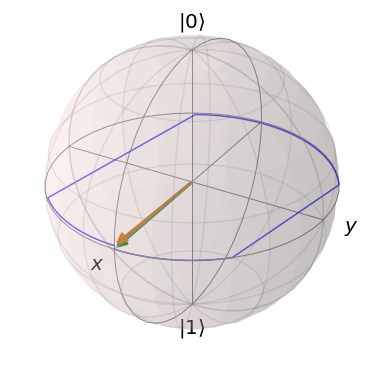

Fidelity of final state:  0.9998030182097302


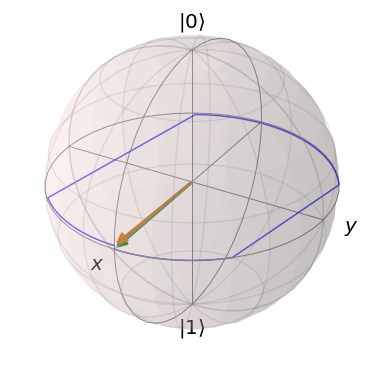

In [28]:
# Explore performance
# Choose a small eta_y
epsilon = 0.02
eta_y = 0.02
tau = 1
x = (basis(2,0)+basis(2,1)).unit()

# Solve
N = 2
result = solve_me_CP(h3, epsilon, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

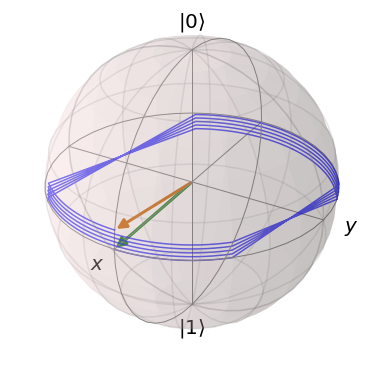

Fidelity of final state:  0.9950833695194219


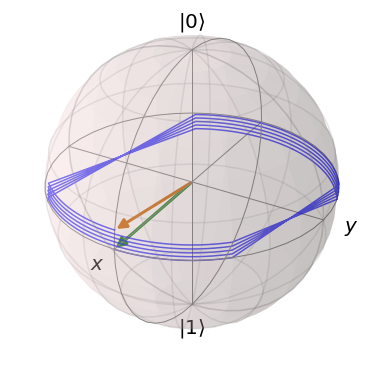

In [29]:
# Solve
N = 10
result = solve_me_CP(h3, epsilon, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

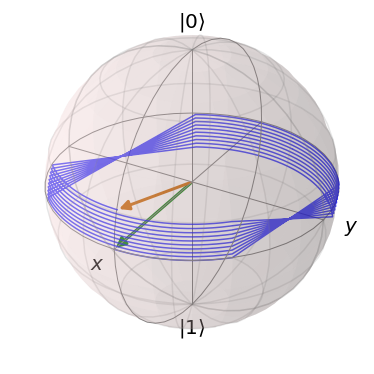

Fidelity of final state:  0.980432159079403


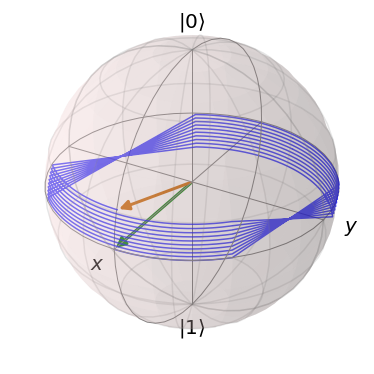

In [30]:
# Solve
N = 20
result = solve_me_CP(h3, epsilon, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

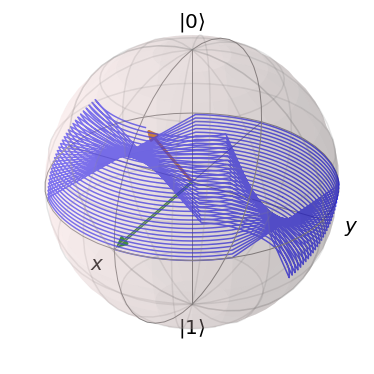

Fidelity of final state:  0.8331416324806868


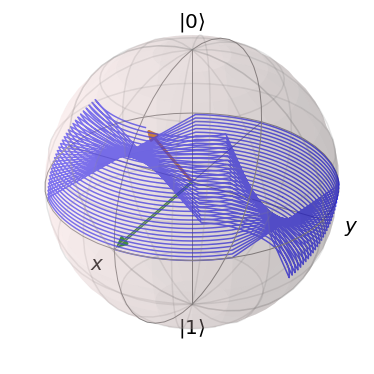

In [31]:
# Solve
N = 60
result = solve_me_CP(h3, epsilon, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

<font color="blue" size="4">
      We can see that for this small error of $\eta_y$ the CP pulse recovers the initial state completely, even for large values of $N.$
</font>

<font color="blue" size="4">
      Let us increse the value of the error $\eta_y.$
</font>

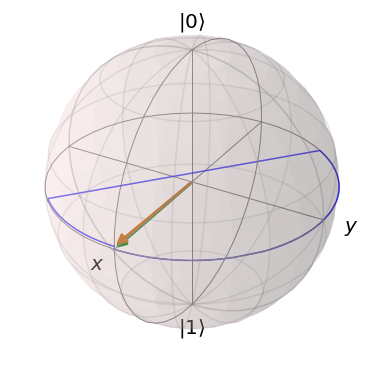

Fidelity of final state:  0.9998794099269865


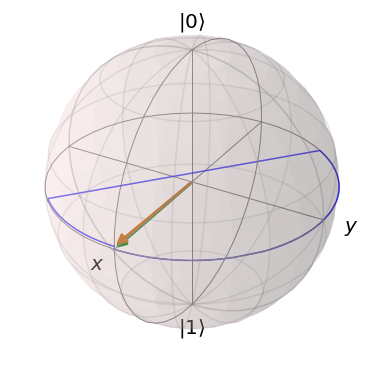

In [32]:
# Solve
eta_y = 0.4
N = 2
result = solve_me_CP(h3, epsilon, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

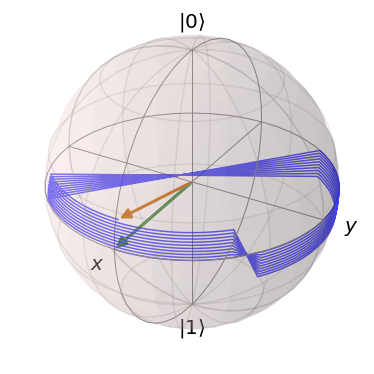

Fidelity of final state:  0.9880193055186535


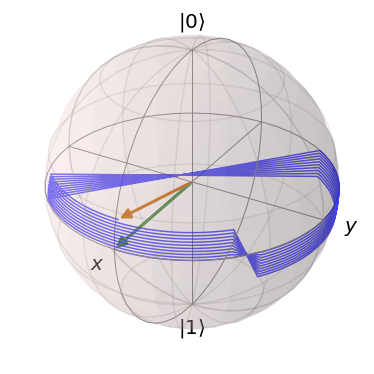

In [33]:
# Solve
N = 20
result = solve_me_CP(h3, epsilon, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

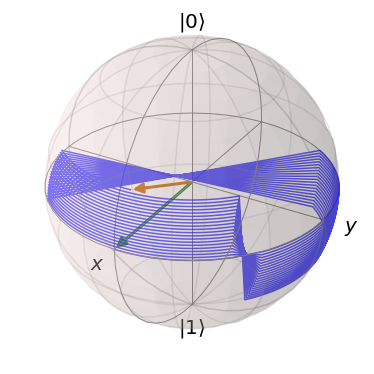

Fidelity of final state:  0.9530340889150494


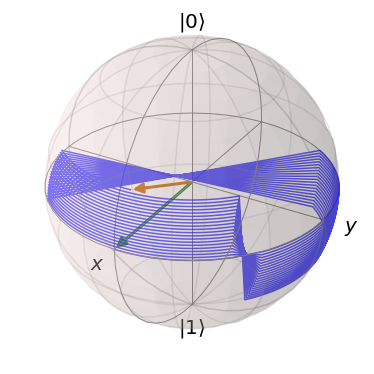

In [34]:
# Solve
N = 40
result = solve_me_CP(h3, epsilon, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

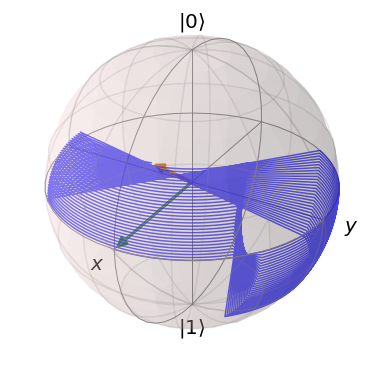

Fidelity of final state:  0.8978385315770281


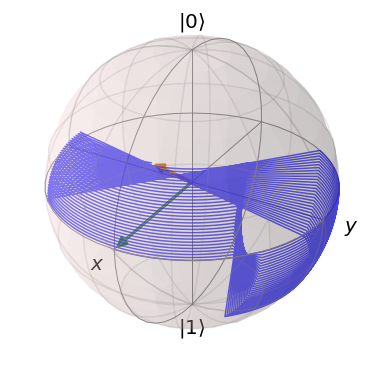

In [35]:
# Solve
N = 60
result = solve_me_CP(h3, epsilon, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

In [36]:
# XY4 with additional axes error
def solve_me_XY4(h3, epsilon, eta_x, eta_y, N, tau, pts=100):
    # create Hamiltonian
    H = h3*sigmaz()
    
    # Operators to measure
    # when blank it calculates full state
    m_ops = [sigmax(), sigmay(), sigmaz()]
    
    # Initial state along x axis
    psi_0 = (basis(2,0)+basis(2,1)).unit()
    psi_i = psi_0
    
    time = np.linspace(0, tau, pts)
    state_list = [None]*pts*2*N
    
    for index, interval in enumerate(range(N)):
        
        # Evolve for time tau, get last state
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts:index*2*pts+pts] = results
        
        # Apply pulse to most recent state
        # The second and fourth pulse should be X
        if index%4 in [1,3]:
            psi_i = (np.cos((np.pi+epsilon)/2)*identity(2)
                     + 1j*np.sin((np.pi+epsilon)/2)*(np.sqrt(1-eta_x)*sigmax()
                                                     + np.sqrt(eta_x)*sigmay()))*results[-1]
        # First and third pulse is Y
        else:
            psi_i = (np.cos((np.pi+epsilon)/2)*identity(2)
                     + 1j*np.sin((np.pi+epsilon)/2)*(np.sqrt(1-eta_y)*sigmay()
                                                     + np.sqrt(eta_y)*sigmax()))*results[-1]
        # Evolve for time tau
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts+pts:(index+1)*2*pts] = results
        
        # Set current state
        psi_i = results[-1]
        
    return state_list

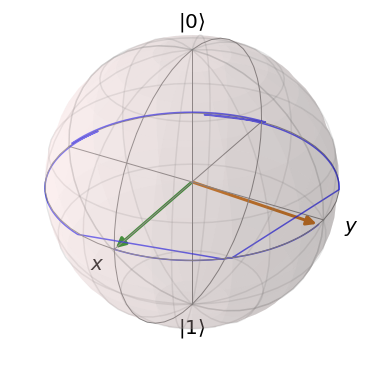

Fidelity of final state:  0.5345723722279969


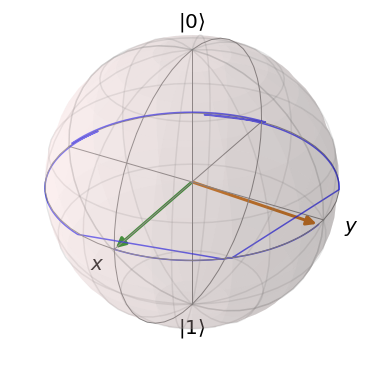

In [37]:
# Solve
epsilon, eta_x, eta_y = 0.02, 0.04, 0.03
N = 4
result = solve_me_XY4(h3, epsilon, eta_x, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

In [38]:
# XY8 with additional axes error
def solve_me_XY8(h3, epsilon, eta_x, eta_y, N, tau, pts=100):
    # create Hamiltonian
    H = h3*sigmaz()
    
    # Operators to measure
    # when blank it calculates full state
    m_ops = [sigmax(), sigmay(), sigmaz()]
    
    # Initial state along x axis
    psi_0 = (basis(2,0)+basis(2,1)).unit()
    psi_i = psi_0
    
    time = np.linspace(0, tau, pts)
    state_list = [None]*pts*2*N
    
    for index, interval in enumerate(range(N)):
        
        # Evolve for time tau, get last state
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts:index*2*pts+pts] = results
        
        # Apply pulse to most recent state
        # The second and fourth pulse should be X
        if index%8 in [1,3,4,6]:
            psi_i = (np.cos((np.pi+epsilon)/2)*identity(2)
                     + 1j*np.sin((np.pi+epsilon)/2)*(np.sqrt(1-eta_x)*sigmax()
                                                     +np.sqrt(eta_x)*sigmay()))*results[-1]
        # First and third pulse is Y
        else:
            psi_i = (np.cos((np.pi+epsilon)/2)*identity(2)
                     + 1j*np.sin((np.pi+epsilon)/2)*(np.sqrt(1-eta_y)*sigmay()
                                                     + np.sqrt(eta_y)*sigmax()))*results[-1]
        # Evolve for time tau
        results = mesolve(H, psi_i, time).states
        state_list[index*2*pts+pts:(index+1)*2*pts] = results
        
        # Set current state
        psi_i = results[-1]
        
    return state_list

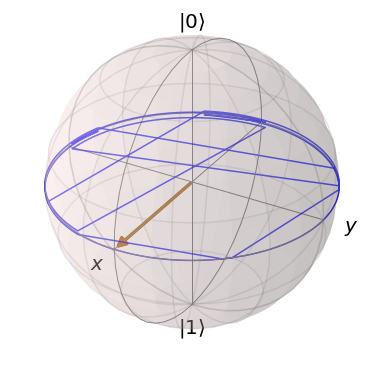

Fidelity of final state:  0.9999993011807142


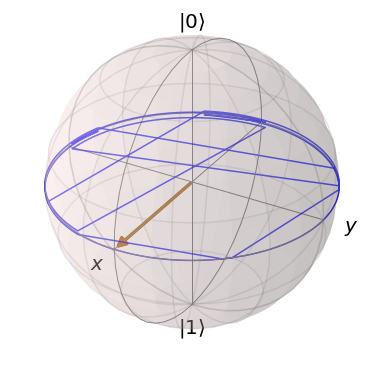

In [39]:
# Explore performance of XY8
N = 8
result = solve_me_XY8(h3, epsilon, eta_x, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

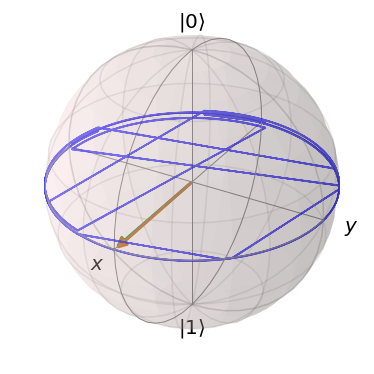

Fidelity of final state:  0.9999888353988032


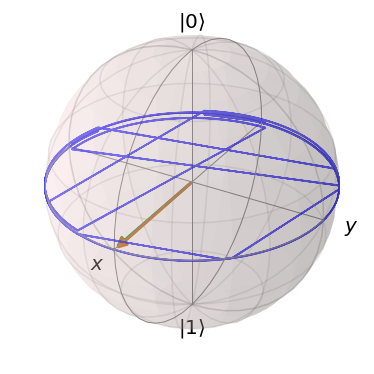

In [40]:
# Explore performance of XY8
N = 32
result = solve_me_XY8(h3, epsilon, eta_x, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)

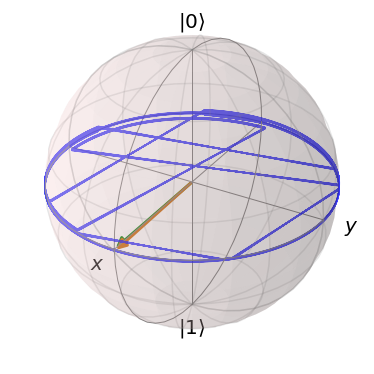

Fidelity of final state:  0.9999555629021426


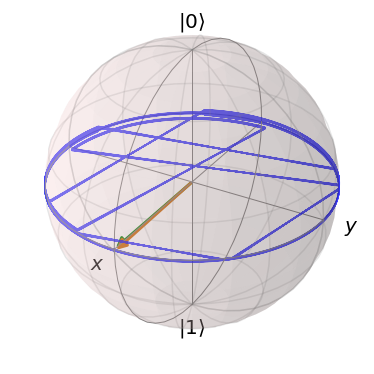

In [41]:
# Explore performance of XY8
N = 64
result = solve_me_XY8(h3, epsilon, eta_x, eta_y, N, tau)

# Plot on Bloch sphere
bloch_sphere = Bloch()

# Add trajectory
bloch_sphere.add_points([expect(sigmax(),result),
                         expect(sigmay(),result),
                         expect(sigmaz(),result)], meth='l')

# Plot initial state
bloch_sphere.add_states(result[0])

# Plot final state & show
bloch_sphere.add_states(result[-1])
bloch_sphere.show()

# Calculate fidelity
print('Fidelity of final state: ', fidelity(result[-1], x)**2)